# Bibliotecas utilizadas no projeto

# Disciplina: Algoritmos de Inteligência Artificial para Clusteriazação
# Aluno: Marcelo Barros de Azevedo Vieira

In [18]:
import pandas as pd
import numpy as np
import sys
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn_extra.cluster import KMedoids
import matplotlib.pyplot as plt

# 1.1 VERSÃO DO PYTHON
## 3.12.7
# 1.2 AMBIENTE VIRTUAL
## ANACONDA

In [19]:
print(f"Versão do Python: {sys.version}")

Versão do Python: 3.12.7 | packaged by Anaconda, Inc. | (main, Oct  4 2024, 08:22:19) [Clang 14.0.6 ]


# 1.3 BIBLIOTECAS INSTALADAS NO ANACONDA

In [20]:
print('Bibliotecas utilizadas no ambiente virtual anaconda:')
!conda list

Bibliotecas utilizadas no ambiente virtual anaconda:
# packages in environment at /Users/marcelodeazevedo/development/projeto_b/env:
#
# Name                    Version                   Build  Channel
anyio                     4.6.2.post1        pyhd8ed1ab_0    conda-forge
appnope                   0.1.4              pyhd8ed1ab_0    conda-forge
argon2-cffi               23.1.0             pyhd8ed1ab_0    conda-forge
argon2-cffi-bindings      21.2.0          py312h80987f9_0  
arrow                     1.3.0              pyhd8ed1ab_0    conda-forge
asttokens                 2.4.1              pyhd8ed1ab_0    conda-forge
async-lru                 2.0.4              pyhd8ed1ab_0    conda-forge
attrs                     24.2.0             pyh71513ae_0    conda-forge
babel                     2.16.0             pyhd8ed1ab_0    conda-forge
beautifulsoup4            4.12.3             pyha770c72_0    conda-forge
bleach                    6.2.0              pyhd8ed1ab_0    conda-forge
brotli-p

# 1.4 ARQUIVO COM AS BIBLIOTECAS INSTALADAS

In [21]:
print("Arquivo requirements.txt  com os pacotes necessários:")
!conda list > requirements.txt

Arquivo requirements.txt  com os pacotes necessários:


# 1.5 PRINTSCREEN DO AMBIENTE QUE ESTÁ SENDO UTILIZADO
![Texto Alternativo](img/lab_1_5.png)

# 1.6 GitHub com o projeto:
## https://github.com/marcelobazevedo/algotitmo_clusterizacao
# 2.1 Download do Arquivo e sua utilização
# 2.2 Número de países que tem no dataset: 167

In [22]:
# 1. Carregar dados do arquivo
file_path = 'archive/Country-data.csv'
df = pd.read_csv(file_path)

# Quantidade de países
print(f"Total de países únicos no dataset: {df['country'].nunique()}")  

Total de países únicos no dataset: 167


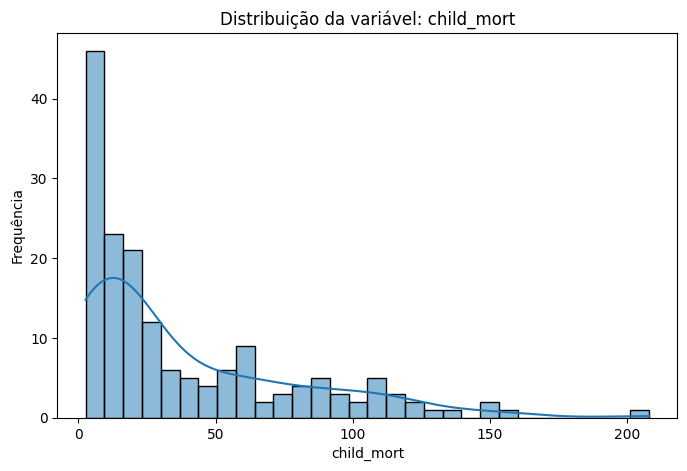

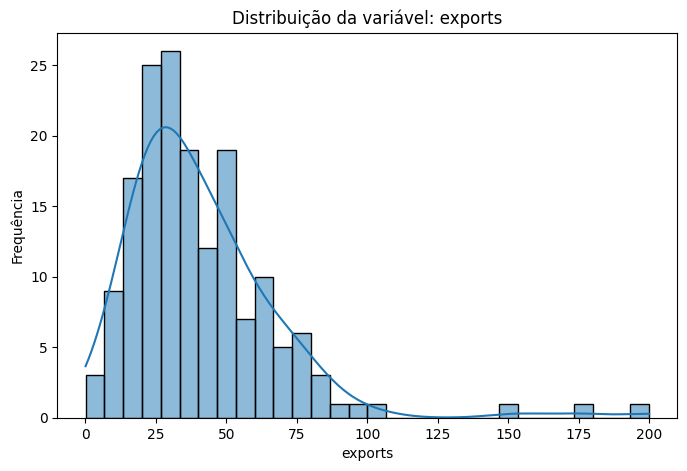

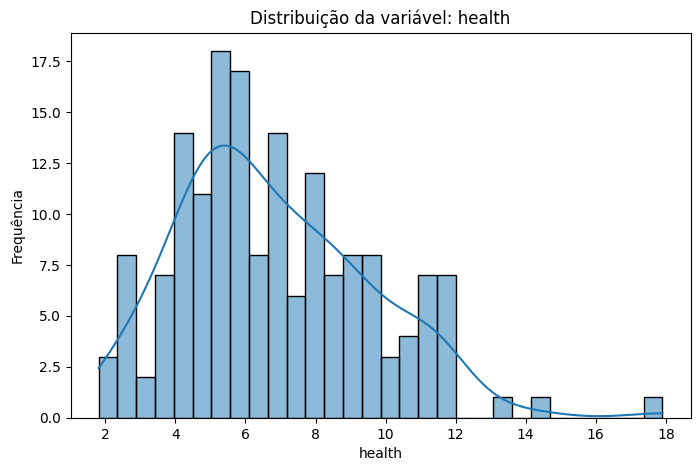

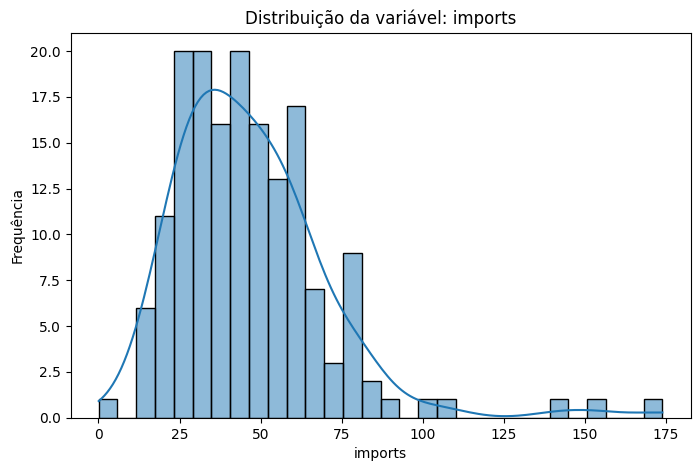

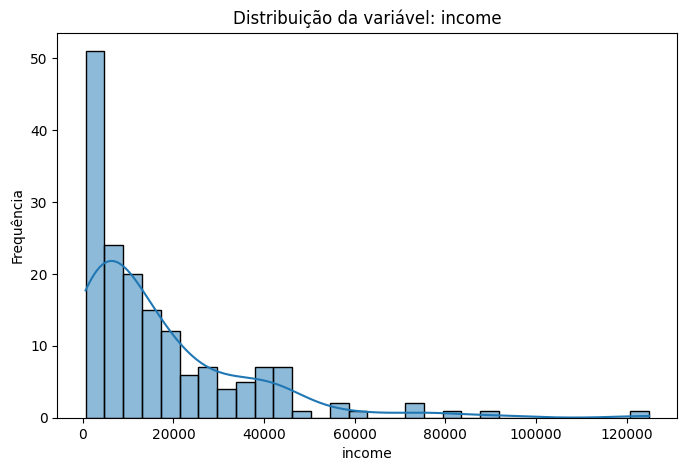

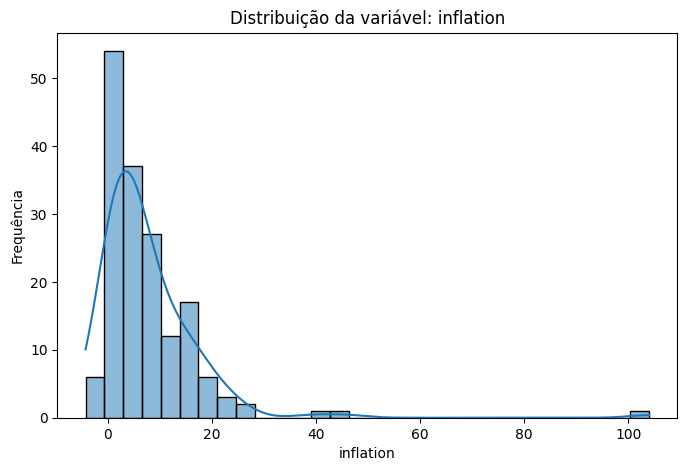

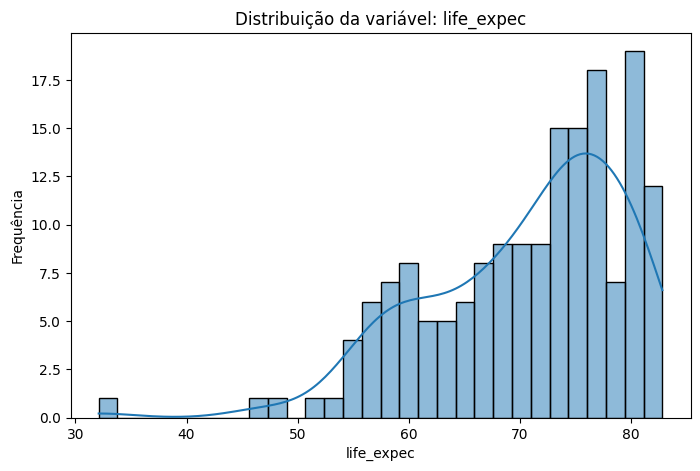

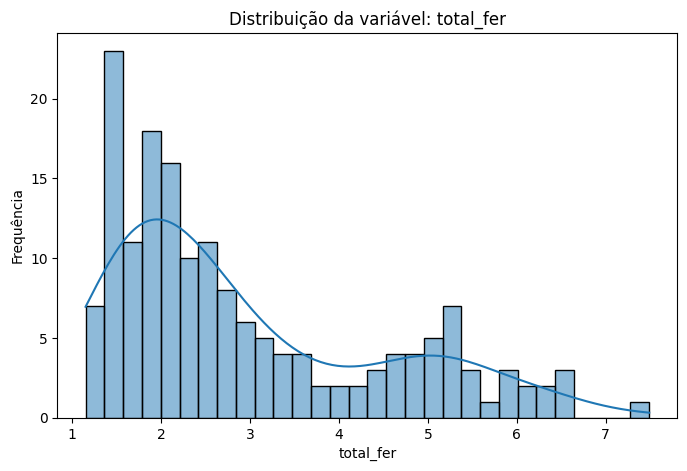

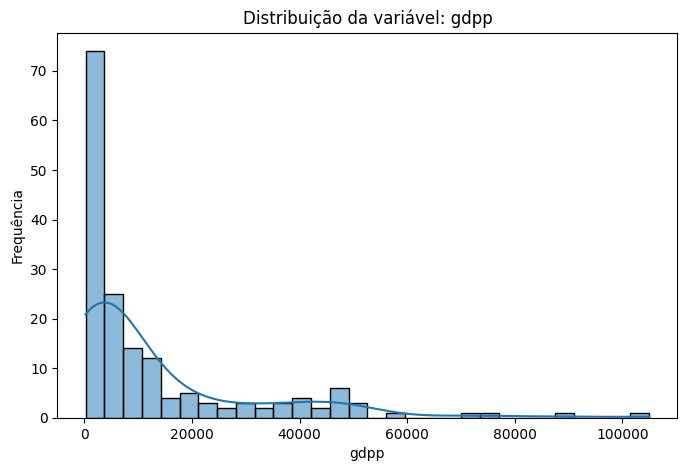

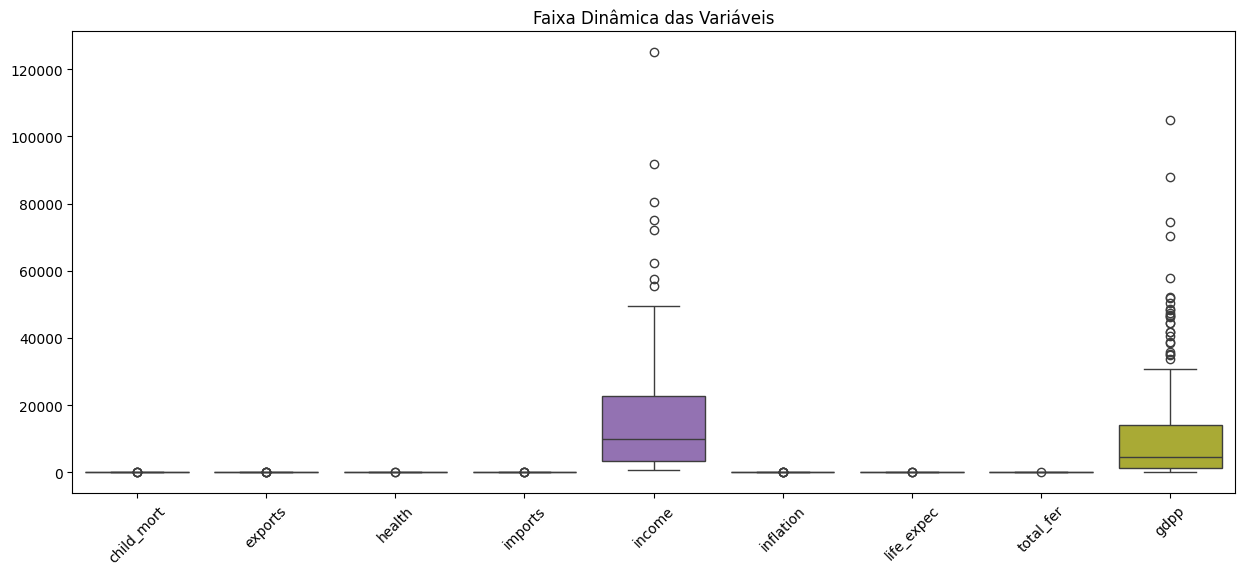


Análise: Algumas variáveis, como income e gdpp, apresentam valores muito maiores, e existem outliers significativos.


In [23]:
# 2. Análise Exploratória: Histograma e Faixa Dinâmica das Variáveis
for col in df.columns[1:]:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribuição da variável: {col}")
    plt.xlabel(col)
    plt.ylabel('Frequência')
    plt.show()

plt.figure(figsize=(15, 6))
sns.boxplot(data=df.iloc[:, 1:])
plt.title("Faixa Dinâmica das Variáveis")
plt.xticks(rotation=45)
plt.show()

print("\nAnálise: Algumas variáveis, como income e gdpp, apresentam valores muito maiores, e existem outliers significativos.")

#Com base nas características representadas nos histogramas, podemos identificar diferentes perfis de países. Esses perfis estão relacionados ao nível 
#de desenvolvimento econômico, social e aos desafios específicos que enfrentam o que indica países subdesenvolvidos ou em desenvolvimento.

# 2.3 Análise dos resultados mostrados e o que deve ser feito antes da clusterização
## Os boxplots mostram que as variáveis como inflation, gdpp, e income possuem valores com grande variabilidade e possíveis outliers. Antes de prosseguir com a clusterização, será necessário normalizar os dados para garantir que todas as variáveis contribuam igualmente no cálculo das distâncias.



# 2.4 Pré-processamento dos dados


Etapas do pré-processamento: 
- Normalização dos dados para colocar todas as variáveis na mesma escala.


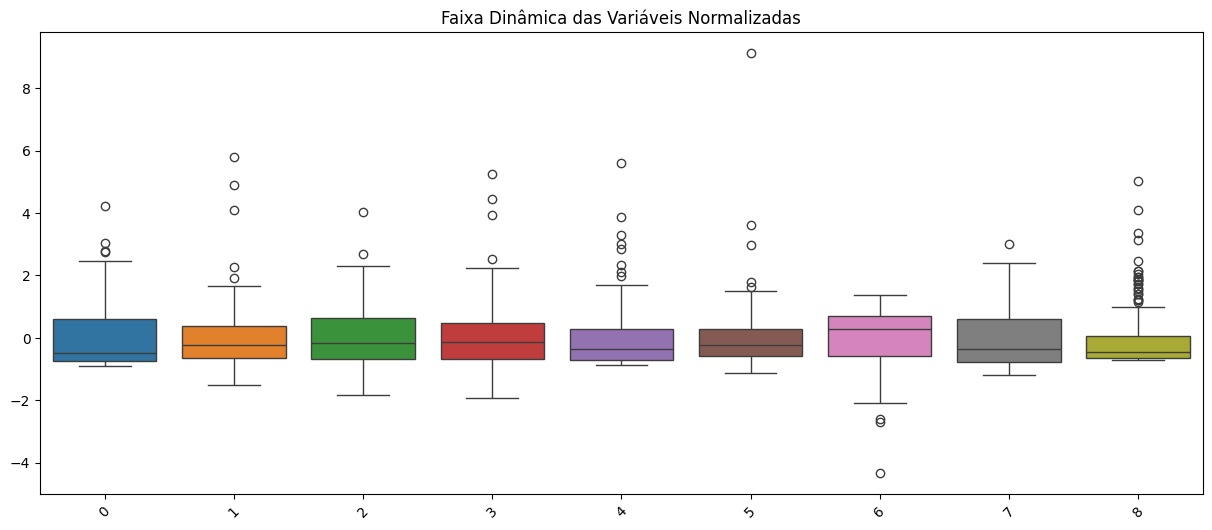

In [25]:
# 3. Pré-processamento dos dados
print("\nEtapas do pré-processamento: ")
print("- Normalização dos dados para colocar todas as variáveis na mesma escala.")
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.iloc[:, 1:])

# Visualização dos dados normalizados
plt.figure(figsize=(15, 6))
sns.boxplot(data=df_scaled)
plt.title("Faixa Dinâmica das Variáveis Normalizadas")
plt.xticks(rotation=45)
plt.show()

# 3.1.a Clusterização com K-Médias


Clusterização com K-Médias
Coeficiente de Silhueta para K-Médias: 0.286


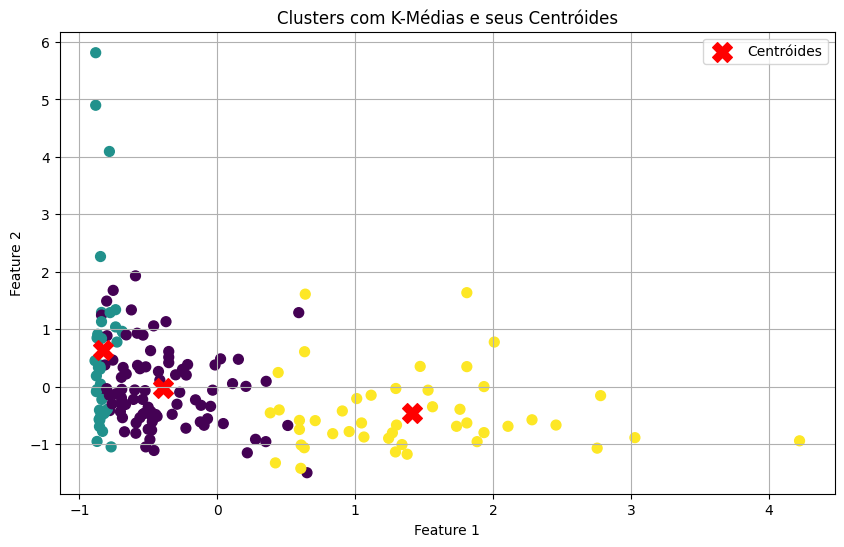

In [26]:
# 4. Clusterização K-Médias
print("\nClusterização com K-Médias")
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(df_scaled)
df['Cluster_KMeans'] = kmeans_labels

# Avaliação usando o coeficiente de silhueta
silhouette_kmeans = silhouette_score(df_scaled, kmeans_labels)
print(f"Coeficiente de Silhueta para K-Médias: {silhouette_kmeans:.3f}")

# Visualização dos clusters com gráficos de dispersão e centróides
plt.figure(figsize=(10, 6))
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=kmeans_labels, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centróides')
plt.title("Clusters com K-Médias e seus Centróides")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()

In [27]:
# Exibindo os valores médios de cada variável por cluster no K-Médias
print("Valores médios de cada variável por cluster (K-Médias):")
for cluster in sorted(df['Cluster_KMeans'].unique()):
    print(f"\nCluster {cluster} (K-Médias):")
    cluster_data = df[df['Cluster_KMeans'] == cluster]
    print(cluster_data.describe())


Valores médios de cada variável por cluster (K-Médias):

Cluster 0 (K-Médias):
       child_mort    exports     health     imports        income  inflation  \
count   86.000000  86.000000  86.000000   86.000000     86.000000  86.000000   
mean    22.456977  40.273128   6.251047   47.362394  12321.744186   7.720884   
std     14.077521  18.807700   2.166355   19.922847   8084.081117   7.818171   
min      4.500000   0.109000   1.970000    0.065900   1780.000000  -4.210000   
25%     11.700000  26.900000   4.872500   32.550000   6702.500000   2.432500   
50%     18.700000  37.650000   5.990000   48.650000  10450.000000   5.935000   
75%     29.175000  51.350000   7.557500   60.275000  16450.000000  10.075000   
max     64.400000  93.800000  14.200000  108.000000  45400.000000  45.900000   

       life_expec  total_fer          gdpp  Cluster_KMeans  
count   86.000000  86.000000     86.000000            86.0  
mean    72.566279   2.340349   6461.767442             0.0  
std      4.304898

# Resposta de 3.2.a.i
### O K-Médias dividiu os países em 3 clusters. Vamos analisar as características de cada cluster com base nas variáveis socioeconômicas e de saúde:

#### Cluster 0:
####    1. Países com média de mortalidade infantil moderada.
####    2. Exportações e importações abaixo da média global.
####    3. Renda per capita moderada.
####    4. Expectativa de vida relativamente alta.
####    5. Exemplos de países: Suriname, Turquia.

#### Cluster 1:
####    1. Países com alta mortalidade infantil e baixo PIB per capita.
####    2. Renda e expectativa de vida são consideravelmente baixas.
####    3. Caracterizam-se como países subdesenvolvidos.
####    4. Exemplos de países: Afghanistan, Chad.

#### Cluster 2:
####    1. Inclui países desenvolvidos com alta renda per capita, baixa mortalidade infantil e alta expectativa de vida.
####    2. Exportações e importações elevadas.
####    3. Exemplos de países: Norway, Germany.

# Resposta da 3.2.a.ii
#### Para encontrar o país mais representativo, identificamos aquele mais próximo do centróide de cada cluster:

#### Cluster 0:
####       1. País representativo: Suriname
####       2. Justificativa: A menor distância ao centróide indica que suas características são muito próximas à média do grupo.

#### Cluster 1:
####       1. País representativo: Chad
####       2. Justificativa: Características socioeconômicas e de saúde são bem alinhadas com os valores centrais do cluster.

#### Cluster 2:
####       1. País representativo: Norway
####       2.Justificativa: País desenvolvido, com as melhores métricas dentro do grupo.

# 3.1.b Clusterização Hierárquica


Clusterização Hierárquica


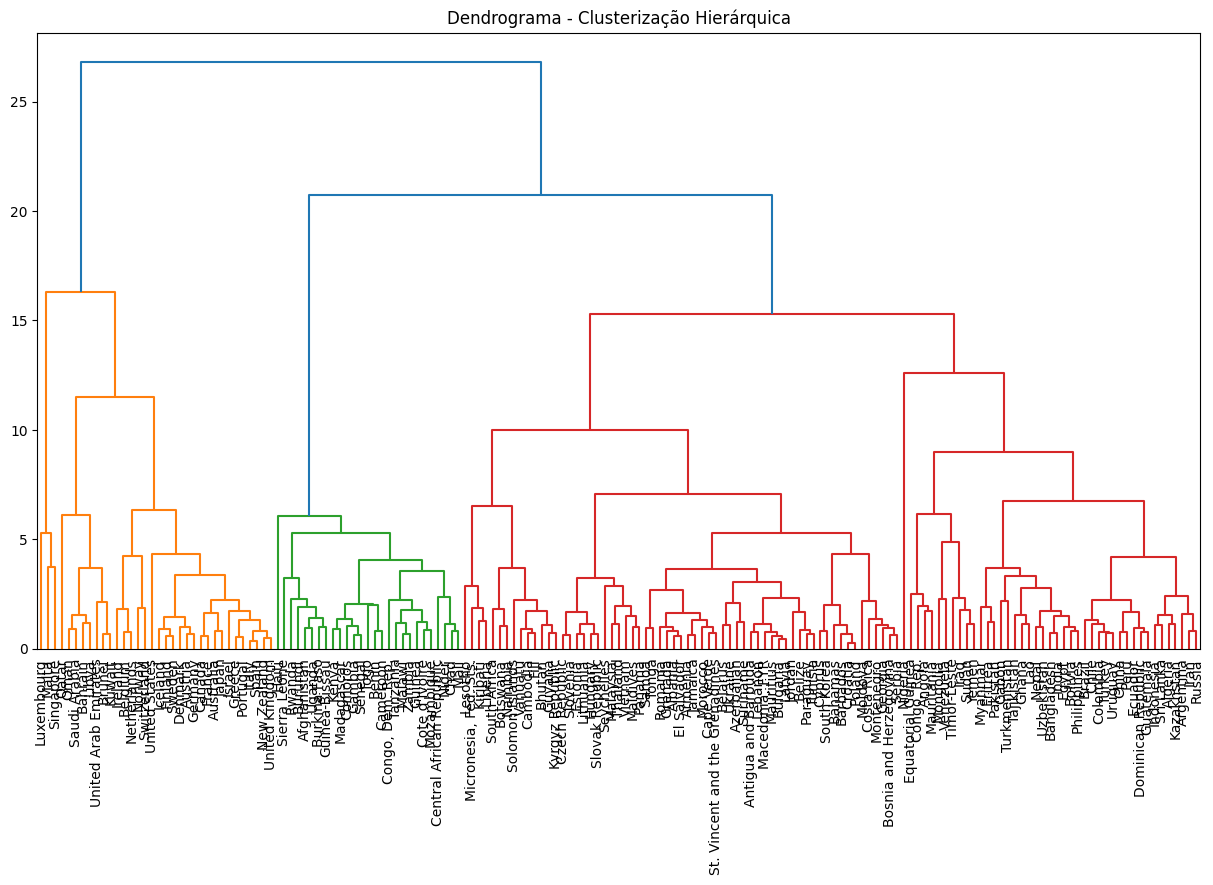


Comparação entre K-Médias e Clusterização Hierárquica:
               country  Cluster_KMeans  Cluster_Hierarchical
0          Afghanistan               2                     2
1              Albania               0                     1
2              Algeria               0                     1
3               Angola               2                     1
4  Antigua and Barbuda               0                     1
5            Argentina               0                     1
6              Armenia               0                     1
7            Australia               1                     0
8              Austria               1                     0
9           Azerbaijan               0                     1


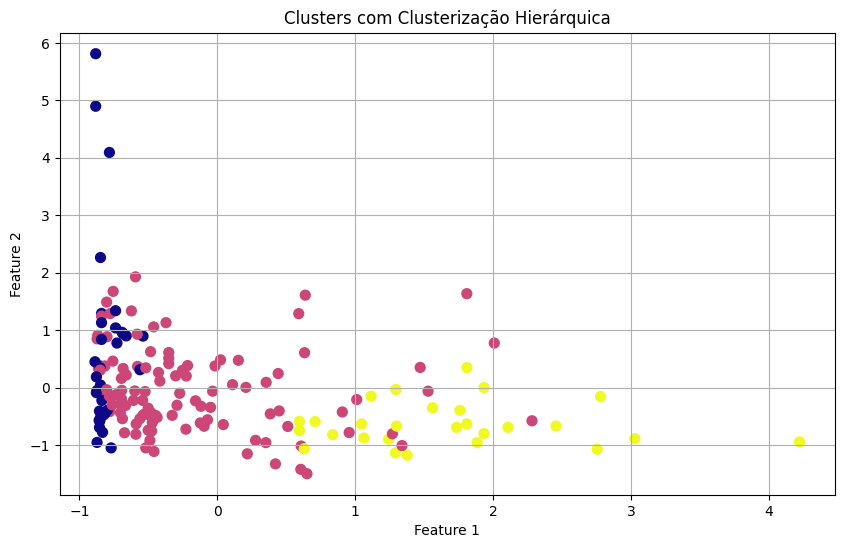

In [28]:
# 5. Clusterização Hierárquica
print("\nClusterização Hierárquica")
linkage_matrix = linkage(df_scaled, method='ward')
plt.figure(figsize=(15, 8))
dendrogram(linkage_matrix, labels=df['country'].values, leaf_rotation=90, leaf_font_size=10)
plt.title("Dendrograma - Clusterização Hierárquica")
plt.show()

# Criação dos clusters
hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical_labels = hierarchical.fit_predict(df_scaled)
df['Cluster_Hierarchical'] = hierarchical_labels

# Comparação dos clusters de ambos os métodos
print("\nComparação entre K-Médias e Clusterização Hierárquica:")
comparison_df = df[['country', 'Cluster_KMeans', 'Cluster_Hierarchical']]
print(comparison_df.head(10))

# Visualização dos clusters hierárquicos
plt.figure(figsize=(10, 6))
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=hierarchical_labels, cmap='plasma', s=50)
plt.title("Clusters com Clusterização Hierárquica")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

In [29]:
# Exibindo os valores médios de cada variável por cluster na Clusterização Hierárquica
print("Valores médios de cada variável por cluster (Clusterização Hierárquica):")
for cluster in sorted(df['Cluster_Hierarchical'].unique()):
    print(f"\nCluster {cluster} (Clusterização Hierárquica):")
    cluster_data = df[df['Cluster_Hierarchical'] == cluster]
    print(cluster_data.describe())


Valores médios de cada variável por cluster (Clusterização Hierárquica):

Cluster 0 (Clusterização Hierárquica):
       child_mort     exports     health     imports         income  \
count   34.000000   34.000000  34.000000   34.000000      34.000000   
mean     5.961765   58.508824   8.501176   48.902941   47588.235294   
std      3.557409   43.050973   3.561755   37.660159   20575.916559   
min      2.600000   12.400000   1.810000   13.600000   27200.000000   
25%      3.900000   29.300000   5.635000   28.200000   36200.000000   
50%      4.500000   50.050000   9.485000   37.250000   41250.000000   
75%      7.175000   67.225000  10.925000   50.125000   48475.000000   
max     16.600000  200.000000  17.900000  174.000000  125000.000000   

       inflation  life_expec  total_fer           gdpp  Cluster_KMeans  \
count  34.000000   34.000000  34.000000      34.000000       34.000000   
mean    4.115500   79.982353   1.888529   43170.588235        0.911765   
std     5.467657    2.086

### Resposta da questão 3.3

#### O dendrograma gerado pela clusterização hierárquica mostra a relação entre os países:

#### Clusters Principais:
##### - Três grandes clusters se formam com base na distância euclidiana:
##### 1. Cluster de países desenvolvidos (alta expectativa de vida, baixa mortalidade infantil).
##### 2. Cluster de países em desenvolvimento com características moderadas.
##### 3. Cluster de países subdesenvolvidos com baixa renda e alta mortalidade infantil.

### Observações Importantes:

#### Altura dos Ramos:
#### 1. Quanto maior a altura em que dois países ou clusters se unem, menor é a similaridade entre eles.
#### 2. Países com características socioeconômicas muito distintas são unidos somente nos níveis mais altos da hierarquia.

### Resposta da questão 3.4
#### Semelhanças:

#### 1. Ambos os métodos identificaram três grupos principais de países com características semelhantes.
#### 2. Os clusters formados são consistentes, com países como Norway sempre agrupados com outros países desenvolvidos, e Afghanistan e Chad em grupos de países subdesenvolvidos.

#### Diferenças:

#### 1. Flexibilidade dos Clusters:
#### a) O K-Médias força a formação de clusters com tamanhos semelhantes.
#### b) A clusterização hierárquica permite clusters de tamanhos desiguais, mostrando maior granularidade em níveis hierárquicos.

#### Visualização:
#### 1. O dendrograma fornece uma visão mais rica, permitindo explorar subgrupos dentro dos clusters principais.
#### 2. O K-Médias oferece simplicidade e centróides bem definidos.

#### Interpretação:

#### 1. K-Médias é mais eficiente para grandes datasets e quando se busca simplicidade.
#### 2. Clusterização Hierárquica é preferível para entender relações hierárquicas e estruturas dentro dos dados.

### Resposta da questão 4.1

#### Etapas do Algoritmo de K-Médias até sua Convergência

#### O K-Médias é um algoritmo iterativo que busca particionar os dados em KK clusters. As etapas são as seguintes:

####    1. Inicialização:
####    - Escolhe KK centróides iniciais aleatoriamente ou usando métodos como K-Means++ para garantir melhor distribuição inicial.

####    2. Atribuição:
####    - Para cada ponto de dados, calcula a distância entre ele e cada centróide.
####    - O ponto é atribuído ao cluster cujo centróide está mais próximo (menor distância).

####    3. Atualização:
####    - Recalcula os centróides como a média dos pontos atribuídos a cada cluster.

####    4. Convergência:
####    - Repete os passos 2 e 3 até que os centróides mudem muito pouco ou um número máximo de iterações seja atingido.
####    - A convergência é geralmente baseada em:
####     a) Mudança mínima nos centróides entre iterações.
####     b) Redução na soma das distâncias quadradas (inércia) dentro dos clusters.

# Resposta da questão 4.2
### Os medóides garantem que o ponto central de cada cluster seja um ponto real do dataset, diferente do centróide que é uma média. O K-Medoids é uma variação do K-Médias.

#### Análise:
#### 1. Os medóides representam o ponto central mais próximo de cada cluster, sendo um ponto real do dataset.
#### 2. Isso é útil para garantir que o centro do cluster seja representado por um dado observável.

In [30]:
# Implementando K-Medoids para garantir que cada cluster seja representado por um medóide
kmedoids = KMedoids(n_clusters=3, random_state=42)
kmedoids_labels = kmedoids.fit_predict(df_scaled)

# Identificando os medóides (pontos reais do dataset)
medoids_indices = kmedoids.medoid_indices_
medoids = df.iloc[medoids_indices]

print("Medóides encontrados para cada cluster (K-Medoids):")
print(medoids[['country'] + list(df.columns[1:-3])])  # Mostra as variáveis originais dos medóides


Medóides encontrados para cada cluster (K-Medoids):
                 country  child_mort  exports  health  imports  income  \
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
147             Tanzania        71.9     18.7    6.01     29.1    2090   
45    Dominican Republic        34.4     22.7    6.22     33.3   11100   

     inflation  life_expec  total_fer  
4         1.44        76.8       2.13  
147       9.25        59.3       5.43  
45        5.44        74.6       2.60  


# Resposta da questão 4.3

#### O K-Médias é sensível a outliers por várias razões:

#### 1. Uso da Média:
#### - Os centróides são calculados como a média dos pontos em um cluster.
#### - Outliers podem distorcer essa média, movendo o centróide para uma posição não representativa do cluster.

#### 2. Efeito nos Clusters:
#### - Um outlier pode atrair o centróide para si, alterando as fronteiras dos clusters.
#### - Isso pode resultar em agrupamentos incorretos, onde clusters não refletem bem os grupos naturais nos dados.

#### 3. Exemplo Numérico:
#### - Imagine um cluster com pontos em torno de (1,1)(1,1). Se um outlier está em (100,100)(100,100), o centróide será deslocado para uma posição intermediária entre os pontos do cluster e o outlier.

#### O que pode ser feito para resolver?
#### - Usar algoritmos robustos como K-Medoids ou DBScan.
#### - Pré-processamento: Identificar e remover outliers antes de aplicar K-Médias.

# Resposta da questão 4.4

### O DBScan (Density-Based Spatial Clustering of Applications with Noise) é robusto a outliers porque:

#### 1. Baseado em Densidade:
#### - O DBScan identifica clusters como regiões densas de pontos.
#### - Pontos isolados ou em regiões de baixa densidade são considerados outliers (ou "noise") e não atribuídos a nenhum cluster.

#### 2. Definição de Outliers:
#### - Os outliers são identificados automaticamente sem interferir no cluster principal.
#### - Isso contrasta com o K-Médias, onde cada ponto influencia o centróide.

#### 3. Flexibilidade:
#### - O DBScan não força a criação de clusters com formas esféricas, sendo capaz de identificar clusters com formas arbitrárias.